<a href="https://colab.research.google.com/github/harshitgupta1998/Doodle_recogn_BEproject/blob/master/CNN_Trial_RUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [0]:
class cnn:
    def __init__(self):
        self.batch_size = 128
        self.dir_data='/content/drive/My Drive/BE_project_dataset_and_code/data/' #change to run locally
        self.num_of_classes,self.dict =create_dic(self.dir_data)
        self.image_size = 28
        self.validate_data = 10000

In [5]:
with open('mini_classes.txt','w') as f: #create a file for mini class
    for file in sorted(os.listdir('/content/drive/My Drive/BE_project_dataset_and_code/data/')): #see how to take data from google drive into colab 
        if file.endswith(".npy"): #copy from drive not local drive change accordingly
            print(file.split(".")[0], file = f)
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
f.close()
classes = [c.replace('\n','').replace(' ','_') for c in classes]
print(classes)


['ambulance', 'apple', 'axe', 'basketball', 'bicycle', 'boomerang', 'butterfly', 'car', 'carrot', 'cat', 'clock', 'cookie', 'cup', 'donut', 'envelope', 'flower', 'hammer', 'key', 'knife', 'lightning', 'pencil', 'pizza', 'rainbow', 'snake', 'spider', 'star', 'tractor', 'tree', 'whale', 'windmill']


In [0]:
dir_data='/content/drive/My Drive/BE_project_dataset_and_code/data/'
def create_dic(dir_data):
    dict={}
    i=0
    for file in sorted(os.listdir('/content/drive/My Drive/BE_project_dataset_and_code/data/')):
        if file.endswith(".npy"):
            str=file.split(".")
            dict[i]=str[0]
            i=i+1
    return i,dict

In [0]:
def load_data(cnn):
    dir_data='/content/drive/My Drive/BE_project_dataset_and_code/data/' #change to run locally all dir_data
    num_of_classess,dict=create_dic(dir_data)
    data_l=np.zeros((1))
    data_d=np.zeros((1,cnn.image_size*cnn.image_size))
    index=0
    class_names = []
    for file in sorted(os.listdir(dir_data)):
        if file.endswith(".npy"):
            print(data_l.shape,data_d.shape,"cur label num!",index+1,file)
            curr_data=np.load(dir_data+file)
            data_size=curr_data.shape
            #take only 30 percent of the data
            part_data=int(0.3*(data_size[0]))
            curr_data=curr_data[1:part_data,:]
            

            #change to white background
            curr_data=255-curr_data;
            data_d=np.concatenate((data_d,curr_data), axis=0)
            data_l=np.concatenate((data_l,np.ones(curr_data.shape[0])*index))
            index=index+1
            class_names.append(file.split('.')[0])

    data_l=np.expand_dims(data_l,1)
    data_all=np.concatenate((data_d,data_l),axis=1)
    data_all=np.random.permutation(data_all)

    x_data=data_all[:,0:-1]
    y_data=data_all[:,-1]
    num_img=x_data.shape[0]
    data_img=np.reshape(x_data,[num_img,cnn.image_size,cnn.image_size])


    data_train=data_img[cnn.validate_data:,:,:]
    data_train=np.expand_dims(data_train,3)

    labels_train=y_data[cnn.validate_data:]
    data_test=data_img[:cnn.validate_data:,:,:]
    data_test=np.expand_dims(data_test,3)

    labels_test=y_data[:cnn.validate_data]


    return data_train,labels_train,data_test,labels_test,class_names

# New Section

In [8]:
quick_draw_cnn=cnn()
x_train, y_train, x_test, y_test, class_names = load_data(quick_draw_cnn)
num_classes = len(class_names)

(1,) (1, 784) cur label num! 1 ambulance.npy
(44401,) (44401, 784) cur label num! 2 apple.npy
(87816,) (87816, 784) cur label num! 3 axe.npy
(125051,) (125051, 784) cur label num! 4 basketball.npy
(165187,) (165187, 784) cur label num! 5 bicycle.npy
(203144,) (203144, 784) cur label num! 6 boomerang.npy
(245947,) (245947, 784) cur label num! 7 butterfly.npy
(281345,) (281345, 784) cur label num! 8 car.npy
(336173,) (336173, 784) cur label num! 9 carrot.npy
(375909,) (375909, 784) cur label num! 10 cat.npy
(412868,) (412868, 784) cur label num! 11 clock.npy
(449027,) (449027, 784) cur label num! 12 cookie.npy
(488431,) (488431, 784) cur label num! 13 cup.npy
(527646,) (527646, 784) cur label num! 14 donut.npy
(569870,) (569870, 784) cur label num! 15 envelope.npy
(610327,) (610327, 784) cur label num! 16 flower.npy
(653771,) (653771, 784) cur label num! 17 hammer.npy
(689473,) (689473, 784) cur label num! 18 key.npy
(737761,) (737761, 784) cur label num! 19 knife.npy
(789556,) (789556, 

windmill


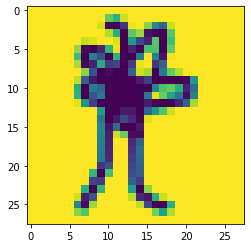

In [9]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [0]:
x_train = x_train.reshape(x_train.shape[0], quick_draw_cnn.image_size, quick_draw_cnn.image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], quick_draw_cnn.image_size, quick_draw_cnn.image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [12]:
model = keras.Sequential()
model.add(layers.Convolution2D(filters=32, kernel_size=[5,5], padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(units=500, activation='relu'))
model.add(layers.Dense(units=num_classes, activation='softmax')) 
# Train model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 32)         

In [13]:
model.fit(x = x_train, y = y_train, validation_data=(x_test, y_test), batch_size=quick_draw_cnn.batch_size, epochs=10)
acc = model.evaluate(x_test, y_test,batch_size=quick_draw_cnn.batch_size)
print('Test accuracy:', acc[1])

Epoch 1/10
9603/9603 [==============================] - 50s 5ms/step - loss: 0.5980 - top_k_categorical_accuracy: 0.9585 - val_loss: 0.4119 - val_top_k_categorical_accuracy: 0.9763
Epoch 2/10
9603/9603 [==============================] - 50s 5ms/step - loss: 0.3769 - top_k_categorical_accuracy: 0.9767 - val_loss: 0.3685 - val_top_k_categorical_accuracy: 0.9783
Epoch 3/10
9603/9603 [==============================] - 50s 5ms/step - loss: 0.3425 - top_k_categorical_accuracy: 0.9787 - val_loss: 0.3534 - val_top_k_categorical_accuracy: 0.9789
Epoch 4/10
9603/9603 [==============================] - 50s 5ms/step - loss: 0.3256 - top_k_categorical_accuracy: 0.9797 - val_loss: 0.3441 - val_top_k_categorical_accuracy: 0.9791
Epoch 5/10
9603/9603 [==============================] - 51s 5ms/step - loss: 0.3144 - top_k_categorical_accuracy: 0.9803 - val_loss: 0.3343 - val_top_k_categorical_accuracy: 0.9804
Epoch 6/10
9603/9603 [==============================] - 50s 5ms/step - loss: 0.3074 - top_k_cat

In [0]:
"""with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))
""""

['axe', 'hammer', 'boomerang', 'envelope', 'knife']


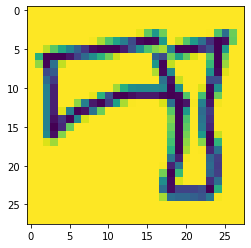

In [14]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

In [0]:
model.save('keras.h5')
with open('/content/gdrive/My Drive/BE_project_dataset_and_code/code/', 'w') as f:
  f.write('keras.h5')

In [0]:
!pip install --upgrade pip

In [0]:
!tensorflowjs_converter --input_format keras keras.h5 model/

In [0]:
!pip install -q keras


In [0]:
import keras
